In [1]:
import sys 
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
myhost = os.uname()[1]
print (myhost)
print (os.getcwd())
sys.path[0]

RK018155
/home/standard/daq/middleware/dev


'/home/standard/daq/middleware/dev'

In [13]:
import midas.file_reader
from datetime import datetime


# Open our file
mfile = midas.file_reader.MidasFile("/media/cygno/data/run99999.mid.gz")

# We can simply iterate over all events in the file
for event in mfile:
    if event.header.is_midas_internal_event():
        print("Saw a special event")
        continue

    bank_names = ", ".join(b.name for b in event.banks.values())
    #print("Event # %s of type ID %s contains banks %s" % (event.header.serial_number, event.header.event_id, bank_names))

    for bank_name, bank in event.banks.items():
        # bank.data is generally a python tuple.
        #
        # If use_numpy=True was specified when opening the MidasFile, then
        # bank.data is a numpy array.
        if bank_names=='INPT':
            print(datetime.utcfromtimestamp(event.header.timestamp).strftime('%Y-%m-%d %H:%M:%S'), 
                  "event: "+str(event.header.serial_number))
            print("  >>>  Entry in bank %s is %s" % (bank_name, bank.data))
            #print(event.dump())

            break


FileNotFoundError: [Errno 2] No such file or directory: '/media/cygno/data/run99999.mid.gz'

In [14]:
import midas.file_reader


# Open our file
mfile = midas.file_reader.MidasFile("/home/standard/daq/data/run00111.mid.gz")
#mfile = midas.file_reader.MidasFile("https://s3.cloud.infn.it/v1/AUTH_2ebf769785574195bde2ff418deac08a/cygno-data/TMP/run00111.mid.gz")

# We can simply iterate over all events in the file
for event in mfile:
    if event.header.is_midas_internal_event():
        print("Saw a special event")
        continue

    bank_names = ", ".join(b.name for b in event.banks.values())
    print("Event # %s of type ID %s contains banks %s" % (event.header.serial_number, event.header.event_id, bank_names))

    for bank_name, bank in event.banks.items():
        # bank.data is generally a python tuple.
        #
        # If use_numpy=True was specified when opening the MidasFile, then
        # bank.data is a numpy array.
        if len(bank.data):
            print("    The first entry in bank %s is %s" % (bank_name, bank.data[0]))


Saw a special event
Event # 0 of type ID 4 contains banks DMND, MSRD, CRNT, STAT, TPTR
    The first entry in bank DMND is 0.0
    The first entry in bank MSRD is -5.199999809265137
    The first entry in bank CRNT is -0.07000000029802322
    The first entry in bank STAT is 0
    The first entry in bank TPTR is 0.0
Event # 0 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 102
Event # 1 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 101
Event # 2 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 100
Event # 3 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 102
Event # 4 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 101
Event # 5 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 100
Event # 6 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 100
Event # 7 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 101
Event # 8 of type I

Event # 91 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 101
Event # 92 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 102
Event # 93 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 101
Event # 94 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 101
Event # 95 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 101
Event # 96 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 102
Event # 97 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 101
Event # 98 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 100
Event # 99 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 101
Event # 100 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 98
Event # 101 of type ID 1 contains banks CAM0
    The first entry in bank CAM0 is 101
Event # 102 of type ID 1 contains banks CAM0
    The first entry in bank CA

In [15]:
# test from jupyter 
import midas.client

"""
A simple example program that connects to a midas experiment,
reads an ODB value, then sets an ODB value.

Expected output is:

```
The experiment is currently stopped
The new value of /pyexample/eg_float is 5.670000
```
"""

if __name__ == "__main__":
    #client = midas.client.MidasClient("test")

    # Read a value from the ODB. The return value is a normal python
    # type (an int in this case, but could also be a float, string, bool,
    # list or dict).
    state = client.odb_get("/Runinfo/State")

    if state == midas.STATE_RUNNING:
        print("The experiment is currently running")
    elif state == midas.STATE_PAUSED:
        print("The experiment is currently paused")
    elif state == midas.STATE_STOPPED:
        print("The experiment is currently stopped")
    else:
        print("The experiment is in an unexpected run state")

The experiment is currently stopped


In [4]:
client.odb_get("/Configurations/FreeRunning")

1

In [5]:
client.odb_get("/Logger/Runlog/SQL/nsigma")

6.0

In [6]:
client.odb_get("/Logger/Write data")

1

In [7]:
client.odb_get("/Runinfo/Run number")
#client.odb_get("/Experiment/MAX_EVENT_SIZE")
#client.odb_get("/Logger")

1419

In [29]:
client.odb_get("/")

OrderedDict([('Experiment',
              OrderedDict([('ODB timeout', 10000),
                           ('Protect ODB', False),
                           ('Enable core dumps', False),
                           ('Security',
                            OrderedDict([('Enable non-localhost RPC', False),
                                         ('RPC ports',
                                          OrderedDict([('ODBEdit',
                                                        '0x00000000'),
                                                       ('cygnus_daq',
                                                        '0x00000000'),
                                                       ('SC Frontend',
                                                        '0x00000000'),
                                                       ('mhttpd',
                                                        '0x00000000'),
                                                       ('Logger',
                

In [16]:
value = client.odb_get("/Equipment/")
for key in value:
    print(key, "->", value[key])

HV -> OrderedDict([('Common', OrderedDict([('Event ID', '0x0003'), ('Trigger mask', '0x0000'), ('Buffer', 'SYSTEM'), ('Type', 16), ('Source', 0), ('Format', 'MIDAS'), ('Enabled', True), ('Read on', 255), ('Period', 60000), ('Event limit', 0), ('Num subevents', '0x00000000'), ('Log history', 1), ('Frontend host', 'localhost'), ('Frontend name', 'SC Frontend'), ('Frontend file name', '/home/cygno/DAQ/online/scfe.cxx'), ('Status', 'Ok'), ('Status color', 'greenLight'), ('Hidden', False), ('Write cache size', 0)])), ('Variables', OrderedDict([('Demand', [10, 0, 2, 0, 400, 0, 1400, 0, 0, 0, 0, 50, 600, 0, 0, 0, 0, 0, 0, 770, 935, 825, 935, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 350, 500, 350, 650, 350, 200, 0, 0, 0, 0, 0, 0, 0, 10, 440, 500, 440, 500, 440, 840, 0, 0, 0, 0, 0, 0, 0]), ('Measured', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.75, 0.75, 0, 0, 0, 0, 0.75, 0, 0.25, 0, 0, 0.5, 0, 0, 0.75, 0.25, 1, 0.25, 0, 0.5, 0.5, 0.5, 0.25, 0.14, 0.12, 0.059999999, 0.2, 0.18000001, 0.039999

In [17]:
value = client.odb_get("/Equipment/Environment/Settings/")
for key in value:
    print(key, "->", value[key])

Devices -> OrderedDict([('Input', OrderedDict([('Device', 'mscb399'), ('Pwd', 'meg'), ('MSCB Address', [65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535]), ('MSCB Index', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]), ('Enabled', True), ('Debug', False), ('Retries', 10)])), ('Output', OrderedDict([('Enabled', True)]))])
Update Threshold -> [0.0099999998, 0.001, 0.15000001, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Input Offset -> [100, 0.40000001, 2.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Input Factor -> [12.5, 0.1, 0.625, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Names Input -> ['P0IIn0', 'P0IIn1', 'P0IIn2', 'P0IIn3', 'P0IIn4', 'P0IIn5', 'P0IIn6', 'P0IIn7

In [9]:
client.odb_get("/Equipment/Environment/Settings/Names Input")

['P0IIn0',
 'P0IIn1',
 'P0IIn2',
 'Humidity',
 'P0IIn4',
 'P0IIn5',
 'P0IIn6',
 'P0IIn7',
 'P0Calib',
 'P1UIn0',
 'P1UIn1',
 'P1UIn2',
 'P1UIn3',
 'P1UIn4',
 'P1UIn5',
 'P1UIn6',
 'P1UIn7',
 'P1Calib',
 'P3IIn0',
 'P3IIn1',
 'P3IIn2',
 'P3IIn3',
 'P3IIn4',
 'P3IIn5',
 'P3IIn6',
 'P3IIn7',
 'P3Calib']

In [1]:
#
# setup MIDAS env equivalent to source setup.sh for jupyter
# waring rispetto all'sh il $ non definisce varibili globali che vanno definite come strighe
#
DAQ_IN_DIR='/home/cygno/DAQ/online'
%set_env MIDAS_EXPTAB=$DAQ_IN_DIR/exptab
%set_env MIDAS_EXPT_NAME=CYGNUS_RD

%set_env MYDRIVER_DIR=$DAQ_IN_DIR/mydrivers

CAENVME='/usr/local/CAEN/CAENVMELib-2.50'
%set_env CAENVME_INCDIR=$CAENVME/include
%set_env CAENVME_LIBDIR=$CAENVME/lib/x64

CAENHV='/usr/local/CAEN/CAENHVWrapper-5.82'
%set_env CAENHV_INCDIR=$CAENHV/include
%set_env CAENHV_LIBDIR=$CAENHV/lib/x64

%set_env ETHERNET_INCDIR=$DAQ_IN_DIR/mydrivers/ethernet
%set_env CAMERA_INCDIR=/usr/local/dcamsdk4/inc
%set_env CAMERA_LIBDIR=/usr/local/lib

client.disconnect()

env: MIDAS_EXPTAB=/home/cygno/DAQ/online/exptab
env: MIDAS_EXPT_NAME=CYGNUS_RD
env: MYDRIVER_DIR=/home/cygno/DAQ/online/mydrivers
env: CAENVME_INCDIR=/usr/local/CAEN/CAENVMELib-2.50/include
env: CAENVME_LIBDIR=/usr/local/CAEN/CAENVMELib-2.50/lib/x64
env: CAENHV_INCDIR=/usr/local/CAEN/CAENHVWrapper-5.82/include
env: CAENHV_LIBDIR=/usr/local/CAEN/CAENHVWrapper-5.82/lib/x64
env: ETHERNET_INCDIR=/home/cygno/DAQ/online/mydrivers/ethernet
env: CAMERA_INCDIR=/usr/local/dcamsdk4/inc
env: CAMERA_LIBDIR=/usr/local/lib


NameError: name 'client' is not defined

In [ ]:
"""
A simple client that registers to receive events from midas.
"""

from matplotlib import pyplot as plt
import numpy as np
import os


import midas
import midas.client

if __name__ == "__main__":
    # Create our client
    client = midas.client.MidasClient("pytest")
    
    # Define which buffer we want to listen for events on (SYSTEM is the 
    # main midas buffer).
    buffer_handle = client.open_event_buffer("SYSTEM",None,1000000000)
    
    # Request events from this buffer that match certain criteria. In this
    # case we will only be told about events with an "event ID" of 14.
    #request_id = client.register_event_request(buffer_handle, event_id = 1)

    while True:
        # If there's an event ready, `event` will contain a `midas.event.Event`
        # object. If not, it will be None. If you want to block waiting for an
        # event to arrive, you could set async_flag to False.
        event = client.receive_event(buffer_handle, async_flag=True)

        if event is not None:

            bank_names = ", ".join(b.name for b in event.banks.values())
            print("Event # %s of type ID %s contains banks %s" % (event.header.serial_number, event.header.event_id, bank_names))

            for bank_name, bank in event.banks.items():
                # bank.data is generally a python tuple.
                #
                # If use_numpy=True was specified when opening the MidasFile, then
                # bank.data is a numpy array.
                if len(bank.data):
                    print("    The first entry in bank %s is %s" % (bank_name, bank.data[0]))
                    if bank_name == 'CAM0':
                        shape = int(event.banks['CAM0'].size_bytes/2**12)
                        image = np.reshape(event.banks['CAM0'].data, (shape, shape))
                        fig = plt.figure(figsize=(10,10))
                        plt.imshow(image, cmap='gray', vmin=95, vmax=1000)
                        display.display(plt.show())
                        display.clear_output()

        # Talk to midas so it knows we're alive, or can kill us if the user
        # pressed the "stop program" button.
        #client.communicate(10)
        
#     # You don't have to cancel the event request manually (it will be done
#     # automatically when the program exits), but for completeness we're just
#     # showing that such a function exists.
#     client.deregister_event_request(buffer_handle, request_id)
#     plt.show()
    

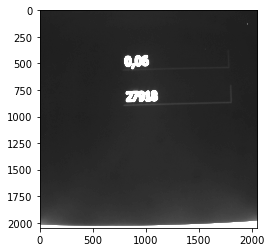

226
Midas shutdown


NameError: name 'exit' is not defined

In [2]:
"""
A simple client that registers to receive events from midas.
"""
from IPython import display

from matplotlib import pyplot as plt
import numpy as np
import os


import midas
import midas.client

if __name__ == "__main__":
    # Create our client
    client = midas.client.MidasClient("pytest")
    
    # Define which buffer we want to listen for events on (SYSTEM is the 
    # main midas buffer).
    buffer_handle = client.open_event_buffer("SYSTEM",None,1000000000)
    
    # Request events from this buffer that match certain criteria. In this
    # case we will only be told about events with an "event ID" of 14.
    request_id = client.register_event_request(buffer_handle, event_id = 1)
    
    while True:
        try:
            # If there's an event ready, `event` will contain a `midas.event.Event`
            # object. If not, it will be None. If you want to block waiting for an
            # event to arrive, you could set async_flag to False.
            event = client.receive_event(buffer_handle, async_flag=True)

            if event is not None:

                shape = int(event.banks['CAM0'].size_bytes/2**12)
                image = np.reshape(event.banks['CAM0'].data, (shape, shape))

                plt.imshow(image, cmap='gray', vmin=95, vmax=1000)

                plt.pause(1)

                print(event.banks['CAM0'].data[1000])
                # Print some information to screen about this event.
                #bank_names = ", ".join(b.name for b in event.banks)
                #print("Received event with timestamp %s containing banks %s" % (event.header.timestamp, bank_names))

            # Talk to midas so it knows we're alive, or can kill us if the user
            # pressed the "stop program" button.
            client.communicate(10)
            display.display(plt.show())
            display.clear_output()
        except KeyboardInterrupt:
            # You don't have to cancel the event request manually (it will be done
            # automatically when the program exits), but for completeness we're just
            # showing that such a function exists.
            client.deregister_event_request(buffer_handle, request_id)
            # Disconnect from midas before we exit.
            client.disconnect()
            break
        



    

                            

In [32]:
import numpy as np
np.arange(0, 2024, 10)

array([   0,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100,
        110,  120,  130,  140,  150,  160,  170,  180,  190,  200,  210,
        220,  230,  240,  250,  260,  270,  280,  290,  300,  310,  320,
        330,  340,  350,  360,  370,  380,  390,  400,  410,  420,  430,
        440,  450,  460,  470,  480,  490,  500,  510,  520,  530,  540,
        550,  560,  570,  580,  590,  600,  610,  620,  630,  640,  650,
        660,  670,  680,  690,  700,  710,  720,  730,  740,  750,  760,
        770,  780,  790,  800,  810,  820,  830,  840,  850,  860,  870,
        880,  890,  900,  910,  920,  930,  940,  950,  960,  970,  980,
        990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090,
       1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200,
       1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310,
       1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420,
       1430, 1440, 1450, 1460, 1470, 1480, 1490, 15